!pip install git+https://github.com/CC-RMD-EpiBio/autoencirt.git

In [1]:
%pylab inline
import numpy as np
import sys
sys.path.append('../bayesianquilts')

import matplotlib.pyplot as plt


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from factor_analyzer import FactorAnalyzer

In [3]:
import tensorflow as tf
import autoencirt
from autoencirt.irt import GRModel, FactorizedGRModel
from autoencirt.data.rwa import item_text, get_data

dim = 2

In [4]:
pd_data = get_data(reorient=True, pandas=True)
responses = pd_data[0].iloc[:, :22]
fa = FactorAnalyzer(n_factors=dim)
fa.fit(responses)
loadings = fa.loadings_
loadings.shape


(22, 2)

In [5]:
tfdata, num_people = get_data(reorient=True)
item_names = [f"Q{j}" for j in range(1, 23)]
scale_indices = [
    [1, 3, 5, 7, 8, 10, 12, 14, 15, 17, 19, 20],
    [0, 2, 4, 6, 9, 11, 13, 16, 18, 21],
]
fgrm = FactorizedGRModel(
    data=tfdata,
    item_keys=item_names,
    num_people=num_people,
    dim=dim,
    eta_scale=1e-3,
    kappa_scale=1e-3,
    weight_exponent=1,
    response_cardinality=10,
    scale_indices=scale_indices,
    discrimination_guess=tf.cast(np.abs(loadings).T, tf.float64)[
        tf.newaxis, :, :, tf.newaxis
    ],
)

grm = GRModel(
    data=tfdata,
    item_keys=item_names,
    num_people=num_people,
    dim=dim,
    eta_scale=1e-3,
    kappa_scale=1e-3,
    weight_exponent=1,
    response_cardinality=10,
    discrimination_guess=tf.cast(np.abs(loadings).T, tf.float64)[
        tf.newaxis, :, :, tf.newaxis
    ],
)

batch_size = 241


def data_factory_factory(batch_size=batch_size, repeat=False, shuffle=False):
    def data_factory(batch_size=batch_size):
        if shuffle:
            out = tfdata.shuffle(batch_size * 10)
        else:
            out = tfdata

        if repeat:
            out = out.repeat()
        return out.batch(batch_size)

    return data_factory

In [6]:
losses = grm.fit(
            data_factory_factory(shuffle=True, repeat=True),
            dataset_size=num_people,
            batches_per_step=1,
            check_every=int(num_people/batch_size),
            batch_size=batch_size,
            num_steps=3000,
            max_decay_steps=100,
            max_plateau_epochs=100,
            sample_size=32, 
            learning_rate=0.0015)

Running optimization for 3000 steps of 1 accumulated batches, checking every 41 steps
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-1


  1%|▏         | 40/3000 [00:09<07:11,  6.86it/s] 

Step 41: average-batch loss:324205.28958721575 rel loss: 3.084465405463368e+302
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-2


  3%|▎         | 81/3000 [00:15<07:53,  6.16it/s]

Step 82: average-batch loss:387777.8590424992 rel loss: 0.1639406891673929
New learning rate: 0.001485


  4%|▍         | 122/3000 [00:23<08:21,  5.74it/s]

Step 123: average-batch loss:351900.5051991923 rel loss: 0.07870183532785714
New learning rate: 0.00147015


  5%|▌         | 163/3000 [00:29<07:16,  6.50it/s]

Step 164: average-batch loss:342047.14953312743 rel loss: 0.05216198986094368
New learning rate: 0.0014554485


  7%|▋         | 204/3000 [00:36<07:15,  6.42it/s]

Step 205: average-batch loss:292278.45332273096 rel loss: 0.1092343137221665
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-3


  8%|▊         | 245/3000 [00:42<07:18,  6.29it/s]

Step 246: average-batch loss:314703.79950469465 rel loss: 0.07125858098077761
New learning rate: 0.001440894015


 10%|▉         | 286/3000 [00:49<07:21,  6.14it/s]

Step 287: average-batch loss:338232.18039126747 rel loss: 0.1358644438130552
New learning rate: 0.0014264850748499998


 11%|█         | 327/3000 [00:56<07:08,  6.24it/s]

Step 328: average-batch loss:282189.97219131805 rel loss: 0.035750671978425776
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-4


 12%|█▏        | 368/3000 [01:03<06:40,  6.57it/s]

Step 369: average-batch loss:295851.87943100533 rel loss: 0.0461781999355976
New learning rate: 0.0014122202241015


 14%|█▎        | 409/3000 [01:09<06:50,  6.32it/s]

Step 410: average-batch loss:269928.83244967216 rel loss: 0.045423601585547424
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-5


 15%|█▌        | 450/3000 [01:16<07:40,  5.54it/s]

Step 451: average-batch loss:272775.2641094009 rel loss: 0.010435079841356682
New learning rate: 0.001398098021860485


 16%|█▋        | 491/3000 [01:22<06:17,  6.64it/s]

Step 492: average-batch loss:247963.74131101277 rel loss: 0.08858186693960753
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-6


 18%|█▊        | 532/3000 [01:29<06:59,  5.89it/s]

Step 533: average-batch loss:277466.22658766335 rel loss: 0.10632820303745866
New learning rate: 0.00138411704164188


 19%|█▉        | 573/3000 [01:36<07:31,  5.37it/s]

Step 574: average-batch loss:266418.616870122 rel loss: 0.06927021758432851
New learning rate: 0.0013702758712254614


 20%|██        | 614/3000 [01:42<05:56,  6.70it/s]

Step 615: average-batch loss:241972.86382700555 rel loss: 0.024758468322672297
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-7


 22%|██▏       | 655/3000 [01:48<05:39,  6.91it/s]

Step 656: average-batch loss:216340.4553040466 rel loss: 0.11848180908621535
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-8


 23%|██▎       | 696/3000 [01:55<05:41,  6.75it/s]

Step 697: average-batch loss:216463.7760200585 rel loss: 0.00056970601862024
New learning rate: 0.0013565731125132067


 25%|██▍       | 737/3000 [02:01<05:40,  6.65it/s]

Step 738: average-batch loss:194638.2521015912 rel loss: 0.11150019571244378
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-9


 26%|██▌       | 778/3000 [02:08<06:28,  5.72it/s]

Step 779: average-batch loss:182323.6481235167 rel loss: 0.06754254922395954
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-10


 27%|██▋       | 819/3000 [02:14<05:28,  6.65it/s]

Step 820: average-batch loss:213576.7889058908 rel loss: 0.14633210351404477
New learning rate: 0.0013430073813880746


 29%|██▊       | 860/3000 [02:20<05:25,  6.57it/s]

Step 861: average-batch loss:196777.29780582705 rel loss: 0.07345181503901282
New learning rate: 0.001329577307574194


 30%|███       | 901/3000 [02:27<05:19,  6.58it/s]

Step 902: average-batch loss:210344.47923841584 rel loss: 0.13321400788056245
New learning rate: 0.0013162815344984519


 31%|███▏      | 942/3000 [02:33<07:34,  4.53it/s]

Step 943: average-batch loss:199743.48120688077 rel loss: 0.08721102174704656
New learning rate: 0.0013031187191534673


 33%|███▎      | 983/3000 [02:40<05:16,  6.36it/s]

Step 984: average-batch loss:182149.67925091827 rel loss: 0.0009550874495846996
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-11


 34%|███▍      | 1024/3000 [02:47<05:26,  6.06it/s]

Step 1025: average-batch loss:174079.19062971632 rel loss: 0.04636101875248649
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-12


 36%|███▌      | 1065/3000 [02:53<05:11,  6.21it/s]

Step 1066: average-batch loss:164634.03046268848 rel loss: 0.057370642876707276
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-13


 37%|███▋      | 1106/3000 [03:00<04:51,  6.50it/s]

Step 1107: average-batch loss:119286.62642348642 rel loss: 0.3801549712556342
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-14


 38%|███▊      | 1147/3000 [03:06<04:51,  6.35it/s]

Step 1148: average-batch loss:146950.7933406094 rel loss: 0.1882546278807879
New learning rate: 0.0012900875319619327


 40%|███▉      | 1188/3000 [03:13<05:04,  5.96it/s]

Step 1189: average-batch loss:142923.62272790782 rel loss: 0.16538201210740752
New learning rate: 0.0012771866566423133


 41%|████      | 1229/3000 [03:20<05:10,  5.71it/s]

Step 1230: average-batch loss:123464.52535723505 rel loss: 0.033838861176197776
New learning rate: 0.00126441479007589


 42%|████▏     | 1270/3000 [03:26<04:17,  6.71it/s]

Step 1271: average-batch loss:146347.3510128958 rel loss: 0.18490751217645776
New learning rate: 0.0012517706421751314


 44%|████▎     | 1311/3000 [03:32<04:38,  6.07it/s]

Step 1312: average-batch loss:118502.60956866946 rel loss: 0.006616030293937461
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-15


 45%|████▌     | 1352/3000 [03:39<04:30,  6.08it/s]

Step 1353: average-batch loss:101108.06549019416 rel loss: 0.172039134505667
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-16


 46%|████▋     | 1393/3000 [03:45<04:05,  6.55it/s]

Step 1394: average-batch loss:105939.79853281869 rel loss: 0.045608289892374365
New learning rate: 0.00123925293575338


 48%|████▊     | 1434/3000 [03:52<04:14,  6.16it/s]

Step 1435: average-batch loss:133588.0804471091 rel loss: 0.2431355765290347
New learning rate: 0.0012268604063958462


 49%|████▉     | 1475/3000 [03:58<03:52,  6.55it/s]

Step 1476: average-batch loss:100367.00768769441 rel loss: 0.007383480085464481
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-17


 51%|█████     | 1516/3000 [04:05<03:56,  6.28it/s]

Step 1517: average-batch loss:71309.21967274022 rel loss: 0.4074899171286581
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-18


 52%|█████▏    | 1557/3000 [04:12<03:28,  6.93it/s]

Step 1558: average-batch loss:86305.31944749513 rel loss: 0.1737563787580668
New learning rate: 0.0012145918023318877


 53%|█████▎    | 1598/3000 [04:18<03:39,  6.38it/s]

Step 1599: average-batch loss:114773.88454451272 rel loss: 0.37869821209123244
New learning rate: 0.0012024458843085688


 55%|█████▍    | 1639/3000 [04:25<03:16,  6.92it/s]

Step 1640: average-batch loss:62320.914231669536 rel loss: 0.1442261486674903
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-19


 56%|█████▌    | 1680/3000 [04:31<03:18,  6.66it/s]

Step 1681: average-batch loss:66907.36568802713 rel loss: 0.0685492756917543
New learning rate: 0.001190421425465483


 57%|█████▋    | 1721/3000 [04:37<03:11,  6.69it/s]

Step 1722: average-batch loss:86146.36031940716 rel loss: 0.2765693872544282
New learning rate: 0.0011785172112108281


 59%|█████▊    | 1762/3000 [04:43<03:03,  6.76it/s]

Step 1763: average-batch loss:62948.443846363356 rel loss: 0.009968945637884476
New learning rate: 0.00116673203909872


 60%|██████    | 1803/3000 [04:49<02:59,  6.68it/s]

Step 1804: average-batch loss:66428.68666285297 rel loss: 0.06183732717811663
New learning rate: 0.0011550647187077326


 61%|██████▏   | 1844/3000 [04:55<02:43,  7.08it/s]

Step 1845: average-batch loss:61594.9472132027 rel loss: 0.011786145638764779
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-20


 63%|██████▎   | 1885/3000 [05:02<02:30,  7.42it/s]

Step 1886: average-batch loss:49733.50547498737 rel loss: 0.23850001372175236
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-21


 64%|██████▍   | 1926/3000 [05:08<02:43,  6.56it/s]

Step 1927: average-batch loss:34393.64145344728 rel loss: 0.44600872060328384
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-22


 66%|██████▌   | 1967/3000 [05:14<02:32,  6.77it/s]

Step 1968: average-batch loss:60656.02642571018 rel loss: 0.43297239400322973
New learning rate: 0.0011435140715206553


 67%|██████▋   | 2008/3000 [05:20<02:18,  7.17it/s]

Step 2009: average-batch loss:60985.44395078835 rel loss: 0.43603523684764983
New learning rate: 0.001132078930805449


 68%|██████▊   | 2049/3000 [05:27<02:47,  5.66it/s]

Step 2050: average-batch loss:62577.83603043774 rel loss: 0.45038621283231534
New learning rate: 0.0011207581414973942


 70%|██████▉   | 2090/3000 [05:33<02:25,  6.24it/s]

Step 2091: average-batch loss:60350.25661471238 rel loss: 0.43009949944334314
New learning rate: 0.0011095505600824203


 71%|███████   | 2131/3000 [05:39<02:10,  6.64it/s]

Step 2132: average-batch loss:46154.80112118069 rel loss: 0.2548198536671009
New learning rate: 0.0010984550544815962
We are in a loss plateau
Restoring from a checkpoint


 72%|███████▏  | 2172/3000 [05:46<02:28,  5.59it/s]

Step 2173: average-batch loss:41736.95246092892 rel loss: 0.17594267368600794
New learning rate: 0.00108747050393678
We are in a loss plateau
Restoring from a checkpoint


 74%|███████▍  | 2213/3000 [05:52<02:00,  6.50it/s]

Step 2214: average-batch loss:57972.54600098189 rel loss: 0.40672535836420315
New learning rate: 0.0010765957988974125
We are in a loss plateau
Restoring from a checkpoint


 75%|███████▌  | 2254/3000 [05:58<01:47,  6.95it/s]

Step 2255: average-batch loss:31329.252619520725 rel loss: 0.09781238228508475
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-23


 76%|███████▋  | 2295/3000 [06:05<01:41,  6.95it/s]

Step 2296: average-batch loss:47616.642168745195 rel loss: 0.3420524591277302
New learning rate: 0.001065829840908438


 78%|███████▊  | 2336/3000 [06:11<01:37,  6.81it/s]

Step 2337: average-batch loss:29853.61834557611 rel loss: 0.04942899238756041
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-24


 79%|███████▉  | 2377/3000 [06:17<01:38,  6.31it/s]

Step 2378: average-batch loss:45907.38211200169 rel loss: 0.34969895968493053
New learning rate: 0.0010551715424993537


 81%|████████  | 2418/3000 [06:24<01:26,  6.77it/s]

Step 2419: average-batch loss:38351.59775598006 rel loss: 0.22158084428383126
New learning rate: 0.0010446198270743603


 82%|████████▏ | 2459/3000 [06:30<01:18,  6.86it/s]

Step 2460: average-batch loss:41803.53889295782 rel loss: 0.28585906513753984
New learning rate: 0.0010341736288036166


 83%|████████▎ | 2500/3000 [06:36<01:10,  7.06it/s]

Step 2501: average-batch loss:27471.43585711431 rel loss: 0.08671488817883843
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-25


 85%|████████▍ | 2541/3000 [06:42<01:10,  6.48it/s]

Step 2542: average-batch loss:37495.059991306756 rel loss: 0.26733186015748284
New learning rate: 0.0010238318925155805


 86%|████████▌ | 2582/3000 [06:48<01:00,  6.96it/s]

Step 2583: average-batch loss:16137.323965927724 rel loss: 0.7023538670424774
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/25b6250f-028e-4379-ae18-d567df47ab47/25b6250f-028e-4379-ae18-d567df47ab47-26


 87%|████████▋ | 2623/3000 [06:55<00:58,  6.39it/s]

Step 2624: average-batch loss:22516.539249879454 rel loss: 0.28331242262222345
New learning rate: 0.0010135935735904246


 89%|████████▉ | 2664/3000 [07:02<00:57,  5.80it/s]

Step 2665: average-batch loss:25827.043931628563 rel loss: 0.37517727508236126
New learning rate: 0.0010034576378545204


 90%|█████████ | 2705/3000 [07:08<00:44,  6.68it/s]

Step 2706: average-batch loss:21614.28217351267 rel loss: 0.253395332013233
New learning rate: 0.0009934230614759751


 92%|█████████▏| 2746/3000 [07:14<00:34,  7.27it/s]

Step 2747: average-batch loss:22783.59571077094 rel loss: 0.2917130302527793
New learning rate: 0.0009834888308612154


 93%|█████████▎| 2787/3000 [07:20<00:31,  6.70it/s]

Step 2788: average-batch loss:35922.150863614545 rel loss: 0.5507695508769443
New learning rate: 0.0009736539425526032
We are in a loss plateau
Restoring from a checkpoint


 94%|█████████▍| 2828/3000 [07:26<00:29,  5.91it/s]

Step 2829: average-batch loss:40362.11834008381 rel loss: 0.6001863968100586
New learning rate: 0.0009639174031270772
We are in a loss plateau
Restoring from a checkpoint


 96%|█████████▌| 2869/3000 [07:32<00:18,  7.09it/s]

Step 2870: average-batch loss:19159.388810951583 rel loss: 0.15773284183764955
New learning rate: 0.0009542782290958064
We are in a loss plateau
Restoring from a checkpoint


 97%|█████████▋| 2910/3000 [07:38<00:14,  6.40it/s]

Step 2911: average-batch loss:23787.440696026617 rel loss: 0.3216031866503716
New learning rate: 0.0009447354468048484
We are in a loss plateau
Restoring from a checkpoint


 98%|█████████▊| 2951/3000 [07:44<00:07,  6.75it/s]

Step 2952: average-batch loss:27401.329046896484 rel loss: 0.4110751365997898
New learning rate: 0.0009352880923367999
We are in a loss plateau
Restoring from a checkpoint


100%|█████████▉| 2992/3000 [07:50<00:01,  7.33it/s]

Step 2993: average-batch loss:17309.667200164728 rel loss: 0.0677276588093991
New learning rate: 0.0009259352114134319
We are in a loss plateau
Restoring from a checkpoint


100%|██████████| 3000/3000 [07:51<00:00,  6.64it/s]

Terminating because we are out of iterations


100%|██████████| 3000/3000 [07:52<00:00,  6.35it/s]


In [7]:
losses = grm.fit(
            data_factory_factory(shuffle=False, repeat=True),
            dataset_size=num_people,
            batches_per_step=1,
            check_every=int(num_people/batch_size),
            batch_size=batch_size,
            num_steps=3000,
            max_decay_steps=100,
            max_plateau_epochs=100,
            sample_size=32, 
            learning_rate=0.0005)

Running optimization for 3000 steps of 1 accumulated batches, checking every 41 steps
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/65580b5c-3fbe-4ba9-bc5f-4ec29d793286/65580b5c-3fbe-4ba9-bc5f-4ec29d793286-1


  1%|▏         | 40/3000 [00:07<07:29,  6.59it/s] 

Step 41: average-batch loss:23256.872517998934 rel loss: 4.2998042803308186e+303
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/65580b5c-3fbe-4ba9-bc5f-4ec29d793286/65580b5c-3fbe-4ba9-bc5f-4ec29d793286-2


  3%|▎         | 81/3000 [00:13<07:59,  6.08it/s]

Step 82: average-batch loss:19651.898319437598 rel loss: 0.18344152508644285
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/65580b5c-3fbe-4ba9-bc5f-4ec29d793286/65580b5c-3fbe-4ba9-bc5f-4ec29d793286-3


  4%|▍         | 122/3000 [00:19<06:55,  6.92it/s]

Step 123: average-batch loss:21295.118352161415 rel loss: 0.0771641653053801
New learning rate: 0.000495


  5%|▌         | 163/3000 [00:26<08:20,  5.67it/s]

Step 164: average-batch loss:28578.940089045384 rel loss: 0.31236434037767613
New learning rate: 0.00049005


  7%|▋         | 204/3000 [00:32<06:42,  6.95it/s]

Step 205: average-batch loss:22254.50139671344 rel loss: 0.11694726522429284
New learning rate: 0.00048514950000000005


  8%|▊         | 245/3000 [00:37<06:37,  6.93it/s]

Step 246: average-batch loss:19216.53387466286 rel loss: 0.02265572176618024
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/65580b5c-3fbe-4ba9-bc5f-4ec29d793286/65580b5c-3fbe-4ba9-bc5f-4ec29d793286-4


 10%|▉         | 286/3000 [00:43<06:29,  6.97it/s]

Step 287: average-batch loss:19922.869545704147 rel loss: 0.03545351082186809
New learning rate: 0.00048029800499999997


 11%|█         | 327/3000 [00:49<06:24,  6.95it/s]

Step 328: average-batch loss:10599.919769713293 rel loss: 0.8128942758198469
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/65580b5c-3fbe-4ba9-bc5f-4ec29d793286/65580b5c-3fbe-4ba9-bc5f-4ec29d793286-5


 12%|█▏        | 368/3000 [00:55<06:28,  6.77it/s]

Step 369: average-batch loss:15334.43596522864 rel loss: 0.3087505928650408
New learning rate: 0.00047549502494999995


 14%|█▎        | 409/3000 [01:01<06:27,  6.68it/s]

Step 410: average-batch loss:22112.16586148851 rel loss: 0.5206295106453337
New learning rate: 0.0004707400747005


 15%|█▌        | 450/3000 [01:07<06:16,  6.77it/s]

Step 451: average-batch loss:15554.710531156406 rel loss: 0.3185395672596134
New learning rate: 0.00046603267395349497


 16%|█▋        | 491/3000 [01:12<06:04,  6.89it/s]

Step 492: average-batch loss:14619.66449392117 rel loss: 0.27495464932723174
New learning rate: 0.00046137234721396004


 18%|█▊        | 532/3000 [01:18<06:16,  6.56it/s]

Step 533: average-batch loss:12201.727618388468 rel loss: 0.13127713540016983
New learning rate: 0.00045675862374182043
We are in a loss plateau
Restoring from a checkpoint


 19%|█▉        | 573/3000 [01:24<06:15,  6.47it/s]

Step 574: average-batch loss:14122.072612772623 rel loss: 0.24940764288902892
New learning rate: 0.0004521910375044022
We are in a loss plateau
Restoring from a checkpoint


 20%|██        | 614/3000 [01:30<05:54,  6.72it/s]

Step 615: average-batch loss:11534.152852260826 rel loss: 0.08099711305320637
New learning rate: 0.0004476691271293582
We are in a loss plateau
Restoring from a checkpoint


 22%|██▏       | 655/3000 [01:36<05:52,  6.65it/s]

Step 656: average-batch loss:13410.587394713279 rel loss: 0.20958572076477477
New learning rate: 0.0004431924358580646
We are in a loss plateau
Restoring from a checkpoint


 23%|██▎       | 696/3000 [01:42<05:26,  7.05it/s]

Step 697: average-batch loss:13687.844638105027 rel loss: 0.2255961365747378
New learning rate: 0.00043876051149948394
We are in a loss plateau
Restoring from a checkpoint


 25%|██▍       | 737/3000 [01:47<05:27,  6.90it/s]

Step 738: average-batch loss:31217.464126531908 rel loss: 0.6604490445876942
New learning rate: 0.00043437290638448915
We are in a loss plateau
Restoring from a checkpoint


 26%|██▌       | 778/3000 [01:53<05:19,  6.96it/s]

Step 779: average-batch loss:15287.98035325724 rel loss: 0.30665009211273053
New learning rate: 0.00043002917732064424
We are in a loss plateau
Restoring from a checkpoint


 27%|██▋       | 819/3000 [01:59<05:18,  6.86it/s]

Step 820: average-batch loss:12224.865379590727 rel loss: 0.1329213500044149
New learning rate: 0.0004257288855474378
We are in a loss plateau
Restoring from a checkpoint


 29%|██▊       | 860/3000 [02:05<05:54,  6.03it/s]

Step 861: average-batch loss:23564.72534551427 rel loss: 0.5501785141013295
New learning rate: 0.0004214715966919634
We are in a loss plateau
Restoring from a checkpoint


 30%|███       | 901/3000 [02:11<05:10,  6.77it/s]

Step 902: average-batch loss:11467.617811092263 rel loss: 0.07566506450360361
New learning rate: 0.00041725688072504375
We are in a loss plateau
Restoring from a checkpoint


 31%|███▏      | 942/3000 [02:17<04:58,  6.90it/s]

Step 943: average-batch loss:13698.882577454104 rel loss: 0.2262201161459071
New learning rate: 0.00041308431191779333
We are in a loss plateau
Restoring from a checkpoint


 33%|███▎      | 983/3000 [02:23<05:12,  6.46it/s]

Step 984: average-batch loss:11554.012575945804 rel loss: 0.08257674984869139
New learning rate: 0.00040895346879861536
We are in a loss plateau
Restoring from a checkpoint


 34%|███▍      | 1024/3000 [02:29<04:46,  6.89it/s]

Step 1025: average-batch loss:15038.863590832945 rel loss: 0.2951648436937379
New learning rate: 0.0004048639341106292
We are in a loss plateau
Restoring from a checkpoint


 36%|███▌      | 1065/3000 [02:35<04:40,  6.91it/s]

Step 1066: average-batch loss:15758.957287279412 rel loss: 0.32737175585408057
New learning rate: 0.0004008152947695229
We are in a loss plateau
Restoring from a checkpoint


 37%|███▋      | 1106/3000 [02:41<04:37,  6.83it/s]

Step 1107: average-batch loss:16936.99658861223 rel loss: 0.37415587738617945
New learning rate: 0.0003968071418218277
We are in a loss plateau
Restoring from a checkpoint


 38%|███▊      | 1147/3000 [02:47<05:35,  5.53it/s]

Step 1148: average-batch loss:18556.11956295852 rel loss: 0.42876420181767355
New learning rate: 0.0003928390704036094
We are in a loss plateau
Restoring from a checkpoint


 40%|███▉      | 1188/3000 [02:53<04:46,  6.32it/s]

Step 1189: average-batch loss:21100.310793552795 rel loss: 0.4976415336520967
New learning rate: 0.00038891067969957333
We are in a loss plateau
Restoring from a checkpoint


 41%|████      | 1229/3000 [02:59<04:27,  6.61it/s]

Step 1230: average-batch loss:13495.18120450075 rel loss: 0.21454038970753977
New learning rate: 0.0003850215729025776
We are in a loss plateau
Restoring from a checkpoint


 42%|████▏     | 1270/3000 [03:05<05:18,  5.43it/s]

Step 1271: average-batch loss:24005.39017404707 rel loss: 0.5584358474134206
New learning rate: 0.0003811713571735518
We are in a loss plateau
Restoring from a checkpoint


 44%|████▎     | 1311/3000 [03:12<04:09,  6.76it/s]

Step 1312: average-batch loss:14544.44231809306 rel loss: 0.27120479851419554
New learning rate: 0.0003773596436018163
We are in a loss plateau
Restoring from a checkpoint


 45%|████▌     | 1352/3000 [03:18<04:20,  6.33it/s]

Step 1353: average-batch loss:9658.200246795352 rel loss: 0.09750465913464672
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/65580b5c-3fbe-4ba9-bc5f-4ec29d793286/65580b5c-3fbe-4ba9-bc5f-4ec29d793286-6


 46%|████▋     | 1393/3000 [03:24<03:53,  6.87it/s]

Step 1394: average-batch loss:14304.533872277325 rel loss: 0.3248154513085342
New learning rate: 0.0003735860471657981


 48%|████▊     | 1434/3000 [03:30<03:46,  6.90it/s]

Step 1435: average-batch loss:12692.85752042651 rel loss: 0.23908385237504717
New learning rate: 0.0003698501866941401


 49%|████▉     | 1475/3000 [03:36<03:56,  6.45it/s]

Step 1476: average-batch loss:17249.372517965196 rel loss: 0.4400839661421683
New learning rate: 0.00036615168482719875


 51%|█████     | 1516/3000 [03:42<03:34,  6.93it/s]

Step 1517: average-batch loss:16031.21050858197 rel loss: 0.397537681784851
New learning rate: 0.0003624901679789267


 52%|█████▏    | 1557/3000 [03:48<03:38,  6.60it/s]

Step 1558: average-batch loss:14854.501348322574 rel loss: 0.3498132303252312
New learning rate: 0.00035886526629913746
We are in a loss plateau
Restoring from a checkpoint


 53%|█████▎    | 1598/3000 [03:54<03:36,  6.48it/s]

Step 1599: average-batch loss:15863.540274621919 rel loss: 0.39116993561353447
New learning rate: 0.00035527661363614604
We are in a loss plateau
Restoring from a checkpoint


 55%|█████▍    | 1639/3000 [04:00<03:19,  6.81it/s]

Step 1640: average-batch loss:14382.808704447049 rel loss: 0.3284899740195311
New learning rate: 0.00035172384749978456
We are in a loss plateau
Restoring from a checkpoint


 56%|█████▌    | 1680/3000 [04:05<02:56,  7.49it/s]

Step 1681: average-batch loss:12055.43642876592 rel loss: 0.19885104916238738
New learning rate: 0.00034820660902478676
We are in a loss plateau
Restoring from a checkpoint


 57%|█████▋    | 1721/3000 [04:11<02:58,  7.16it/s]

Step 1722: average-batch loss:9288.584146449462 rel loss: 0.03979251245596715
Saved a checkpoint: /var/folders/6s/m6kbjxb16sl9cg9rg6mj5czrv6ht9f/T/tfcheckpoints/65580b5c-3fbe-4ba9-bc5f-4ec29d793286/65580b5c-3fbe-4ba9-bc5f-4ec29d793286-7


 59%|█████▊    | 1762/3000 [04:16<02:55,  7.07it/s]

Step 1763: average-batch loss:13800.626092837068 rel loss: 0.32694472816197
New learning rate: 0.0003447245429345389


 60%|██████    | 1803/3000 [04:22<02:59,  6.67it/s]

Step 1804: average-batch loss:10531.186816952595 rel loss: 0.1179926528796214
New learning rate: 0.00034127729750519346


 61%|██████▏   | 1844/3000 [04:28<02:37,  7.36it/s]

Step 1845: average-batch loss:16111.618398755807 rel loss: 0.4234853435228606
New learning rate: 0.00033786452453014155


 63%|██████▎   | 1885/3000 [04:33<02:26,  7.61it/s]

Step 1886: average-batch loss:23501.516743071814 rel loss: 0.6047666094067008
New learning rate: 0.0003344858792848401


 64%|██████▍   | 1926/3000 [04:39<02:31,  7.10it/s]

Step 1927: average-batch loss:10416.722672581991 rel loss: 0.10830071622257148
New learning rate: 0.00033114102049199175
We are in a loss plateau
Restoring from a checkpoint


 66%|██████▌   | 1967/3000 [04:44<02:28,  6.97it/s]

Step 1968: average-batch loss:15784.833091933495 rel loss: 0.41155005616143026
New learning rate: 0.0003278296102870718
We are in a loss plateau
Restoring from a checkpoint


 67%|██████▋   | 2008/3000 [04:50<02:16,  7.26it/s]

Step 2009: average-batch loss:19699.78672062532 rel loss: 0.5284931619729425
New learning rate: 0.0003245513141842011
We are in a loss plateau
Restoring from a checkpoint


 68%|██████▊   | 2049/3000 [04:56<02:29,  6.35it/s]

Step 2050: average-batch loss:12625.608292884002 rel loss: 0.26430600958175937
New learning rate: 0.00032130580104235905
We are in a loss plateau
Restoring from a checkpoint


 70%|██████▉   | 2090/3000 [05:02<02:11,  6.94it/s]

Step 2091: average-batch loss:10674.432399953403 rel loss: 0.1298287535653877
New learning rate: 0.0003180927430319355
We are in a loss plateau
Restoring from a checkpoint


 71%|███████   | 2131/3000 [05:08<01:59,  7.29it/s]

Step 2132: average-batch loss:13473.806268769062 rel loss: 0.31061914048894457
New learning rate: 0.00031491181560161616
We are in a loss plateau
Restoring from a checkpoint


 72%|███████▏  | 2172/3000 [05:13<01:46,  7.80it/s]

Step 2173: average-batch loss:13308.629129887575 rel loss: 0.3020630407688032
New learning rate: 0.00031176269744559996
We are in a loss plateau
Restoring from a checkpoint


 74%|███████▍  | 2213/3000 [05:18<01:51,  7.04it/s]

Step 2214: average-batch loss:19714.71701360641 rel loss: 0.5288502421800523
New learning rate: 0.00030864507047114397
We are in a loss plateau
Restoring from a checkpoint


 75%|███████▌  | 2254/3000 [05:24<01:40,  7.39it/s]

Step 2255: average-batch loss:12339.798895235297 rel loss: 0.2472661649262359
New learning rate: 0.0003055586197664325
We are in a loss plateau
Restoring from a checkpoint


 76%|███████▋  | 2295/3000 [05:29<01:41,  6.93it/s]

Step 2296: average-batch loss:12223.86419571304 rel loss: 0.24012701730546
New learning rate: 0.0003025030335687682
We are in a loss plateau
Restoring from a checkpoint


 78%|███████▊  | 2336/3000 [05:35<01:31,  7.26it/s]

Step 2337: average-batch loss:13117.477538002322 rel loss: 0.2918925060447229
New learning rate: 0.0002994780032330805
We are in a loss plateau
Restoring from a checkpoint


 79%|███████▉  | 2377/3000 [05:41<01:34,  6.58it/s]

Step 2378: average-batch loss:16246.159224163173 rel loss: 0.4282596878261293
New learning rate: 0.0002964832232007497
We are in a loss plateau
Restoring from a checkpoint


 81%|████████  | 2418/3000 [05:47<01:26,  6.76it/s]

Step 2419: average-batch loss:11861.530553063356 rel loss: 0.2169152113299076
New learning rate: 0.00029351839096874223
We are in a loss plateau
Restoring from a checkpoint


 82%|████████▏ | 2459/3000 [05:52<01:09,  7.76it/s]

Step 2460: average-batch loss:13846.449002278288 rel loss: 0.32917211157018506
New learning rate: 0.00029058320705905476
We are in a loss plateau
Restoring from a checkpoint


 83%|████████▎ | 2500/3000 [05:58<01:06,  7.55it/s]

Step 2501: average-batch loss:12712.354817699921 rel loss: 0.2693262358035669
New learning rate: 0.00028767737498846423
We are in a loss plateau
Restoring from a checkpoint


 85%|████████▍ | 2541/3000 [06:03<01:03,  7.24it/s]

Step 2542: average-batch loss:11256.85710458066 rel loss: 0.17485102101280692
New learning rate: 0.0002848006012385796
We are in a loss plateau
Restoring from a checkpoint


 86%|████████▌ | 2582/3000 [06:10<01:00,  6.90it/s]

Step 2583: average-batch loss:18357.17898786772 rel loss: 0.4940080851971701
New learning rate: 0.0002819525952261938
We are in a loss plateau
Restoring from a checkpoint


 87%|████████▋ | 2623/3000 [06:16<01:02,  6.05it/s]

Step 2624: average-batch loss:17514.58157760008 rel loss: 0.46966565514023423
New learning rate: 0.00027913306927393185
We are in a loss plateau
Restoring from a checkpoint


 89%|████████▉ | 2664/3000 [06:22<00:53,  6.31it/s]

Step 2665: average-batch loss:11342.051281900855 rel loss: 0.1810490081920388
New learning rate: 0.00027634173858119256
We are in a loss plateau
Restoring from a checkpoint


 90%|█████████ | 2705/3000 [06:28<00:45,  6.44it/s]

Step 2706: average-batch loss:9964.607930175314 rel loss: 0.06784248697619939
New learning rate: 0.00027357832119538064
We are in a loss plateau
Restoring from a checkpoint


 92%|█████████▏| 2746/3000 [06:35<00:42,  6.03it/s]

Step 2747: average-batch loss:9414.89107783444 rel loss: 0.013415655087326806
New learning rate: 0.0002708425379834268
We are in a loss plateau
Restoring from a checkpoint


 93%|█████████▎| 2787/3000 [06:41<00:29,  7.24it/s]

Step 2788: average-batch loss:14404.708732464138 rel loss: 0.3551702905650829
New learning rate: 0.00026813411260359247
We are in a loss plateau
Restoring from a checkpoint


 94%|█████████▍| 2828/3000 [06:47<00:22,  7.55it/s]

Step 2829: average-batch loss:12025.38810217457 rel loss: 0.22758549931791444
New learning rate: 0.0002654527714775566
We are in a loss plateau
Restoring from a checkpoint


 96%|█████████▌| 2869/3000 [06:52<00:17,  7.37it/s]

Step 2870: average-batch loss:13822.887915122617 rel loss: 0.32802868666196033
New learning rate: 0.000262798243762781
We are in a loss plateau
Restoring from a checkpoint


 97%|█████████▋| 2910/3000 [06:57<00:12,  7.33it/s]

Step 2911: average-batch loss:18663.24570418901 rel loss: 0.5023060675686963
New learning rate: 0.0002601702613251532
We are in a loss plateau
Restoring from a checkpoint


 98%|█████████▊| 2951/3000 [07:03<00:06,  7.28it/s]

Step 2952: average-batch loss:10748.900112535743 rel loss: 0.13585724593190784
New learning rate: 0.0002575685587119017
We are in a loss plateau
Restoring from a checkpoint


100%|█████████▉| 2992/3000 [07:09<00:01,  7.46it/s]

Step 2993: average-batch loss:10772.876718028738 rel loss: 0.13778052143632782
New learning rate: 0.00025499287312478265
We are in a loss plateau
Restoring from a checkpoint


100%|██████████| 3000/3000 [07:10<00:00,  7.39it/s]

Terminating because we are out of iterations


100%|██████████| 3000/3000 [07:10<00:00,  6.97it/s]


In [8]:
params = grm.sample(256)
discrim = params['discriminations']
discrim.shape

TensorShape([256, 1, 2, 22, 1])

In [9]:
discrim_mean = np.mean(discrim, axis=0)

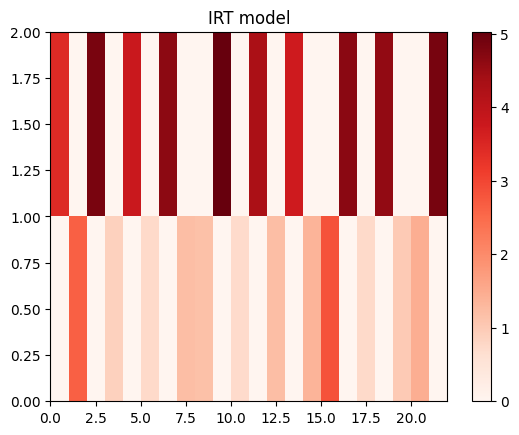

In [10]:
plt.pcolormesh(discrim_mean[0, ..., 0], vmin=0, cmap='Reds')
_ = plt.colorbar()
_ = plt.title("IRT model")

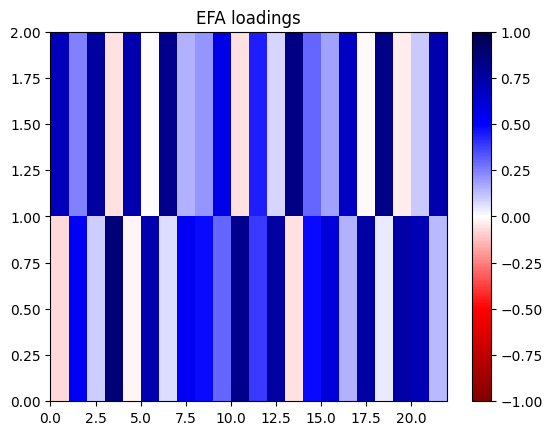

In [11]:
plt.pcolormesh(loadings.T, cmap="seismic_r", vmin=-1, vmax=1)
plt.colorbar()
_ = plt.title("EFA loadings")

In [12]:
discrim_mean[0, ..., 0]

array([[3.63821840e-03, 2.63904611e+00, 6.42202648e-03, 8.87342614e-01,
        1.74339884e-03, 7.27777666e-01, 4.66110151e-03, 1.21105366e+00,
        1.15990417e+00, 9.80356921e-03, 7.12735042e-01, 1.05477750e-02,
        1.20982302e+00, 2.97114635e-03, 1.36225148e+00, 2.83686845e+00,
        7.45009905e-03, 7.40199696e-01, 2.78707525e-03, 1.01939562e+00,
        1.45469356e+00, 7.56752379e-03],
       [3.44988801e+00, 6.61171798e-03, 4.84539654e+00, 1.78985213e-03,
        3.80675124e+00, 6.84438644e-05, 4.64517628e+00, 3.21574818e-03,
        5.09718243e-03, 5.02889942e+00, 1.62508903e-03, 4.28967325e+00,
        2.62676407e-03, 3.71943037e+00, 3.83159325e-03, 6.04814664e-03,
        4.66604169e+00, 3.68985630e-04, 4.59454364e+00, 1.43963954e-03,
        3.21823911e-03, 4.86591291e+00]])

In [13]:
scale_indices = [np.where(discrim_mean[0, ..., 0][0, :] > .5)[0].tolist()]
scale_indices += [[i for i in range(22) if i not in scale_indices[0]]]
scale_indices

[[1, 3, 5, 7, 8, 10, 12, 14, 15, 17, 19, 20],
 [0, 2, 4, 6, 9, 11, 13, 16, 18, 21]]

In [14]:
params.keys()

dict_keys(['mu', 'kappa_a', 'kappa', 'eta', 'discriminations', 'difficulties0', 'ddifficulties', 'abilities'])

# Build fully factorized model

In [15]:
fgrm = FactorizedGRModel(
    data=tfdata,
    item_keys=item_names,
    num_people=num_people,
    dim=dim,
    eta_scale=1e-3,
    kappa_scale=1e-3,
    weight_exponent=1,
    response_cardinality=10,
    scale_indices=scale_indices,
    discrimination_guess=tf.cast(np.abs(loadings).T, tf.float64)[tf.newaxis, :, :, tf.newaxis]
)